# Problem Statement 

*  We need to predict  the chance of admission based on he student various scores .

--> __Feature or independent Variables 
- GRE Score
- TOEFL Score
- SOP 
- LOR
- CGPA
- Research

-->__Label/Target
- Chance of Admission

Refer SKlearn official Documnetation if yor are sure about syntax or parameter .


https://scikit-learn.org/stable/index.html


In [2]:
#Lets Start with importing necessary libraries.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
#Fill the null values.
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [7]:
#Verify if Nan's filled 
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now , The data looks good and there are no missing values , also the first column is just serial number , so we dont  need that column . Lets drop it form the data and make it more clean. 

In [8]:
del data['Serial No.']
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [ ]:
data=data.drop(columns=['Serial No.'])

Lets visualize the data and analyze the relationship between independent and dependent variables


--> * Continuoues Data always form a normal distribution *

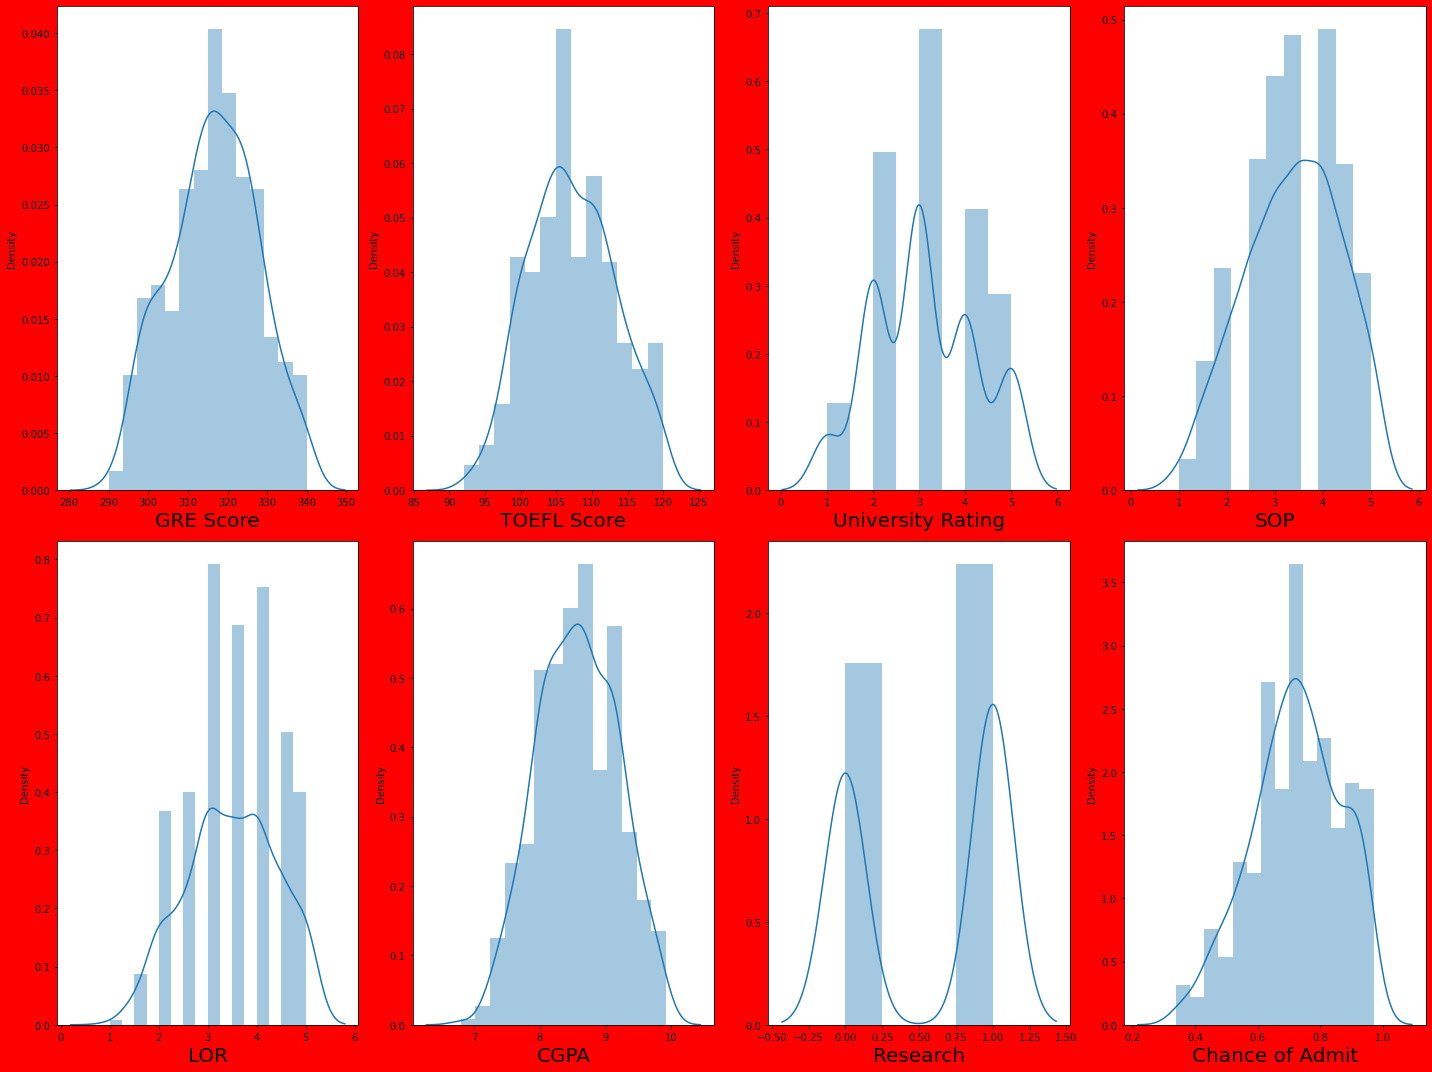

In [10]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

The data distribution looks decent enough and there doesnot sems to by any skeweness. 



Great lets go ahead .Lets observe the relationship between indipendent and dependent variables.

In [11]:
#Divide dataset into Features and label
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])


#First we need to sepatrate features and labels so in y am 
# keeping label and in x  i am dropping Chance of Admit

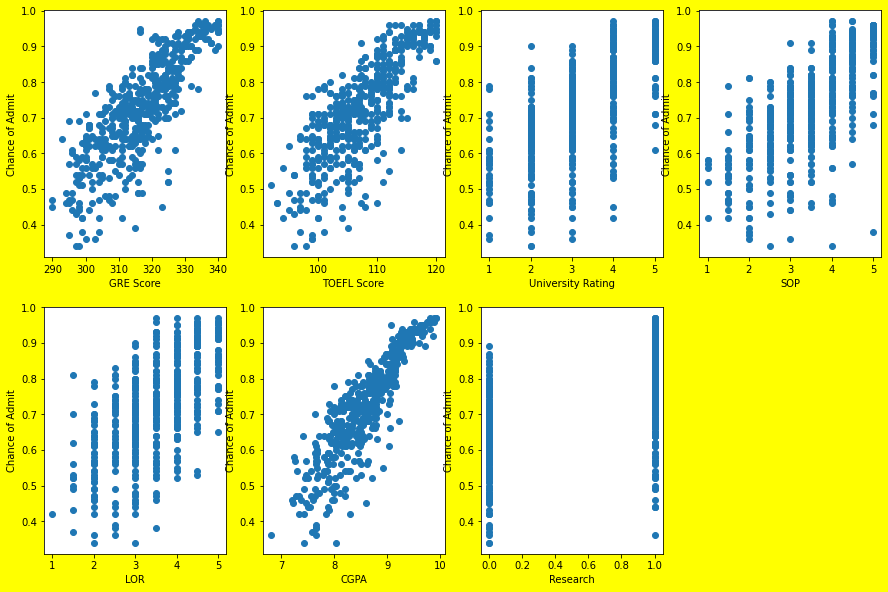

In [12]:
#Visualizing  relationship

plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber +=1
plt.show()

In [13]:
#We have check only there is relationship or not  , dont worry about there us less relationship.




In [14]:
# Great , The relationship between the dependent variable and independent varible look fairly linear
# Thus , our linearly assumption is satisfied.

Standard Scaler - We are going to do our columns to unit less , and then we are going to standadize  this data then we called a standard scaler .

Suppose we have a different different unit in features then we have to remove all unit and standardize the data..

Example  -- > I have Four Friends  and  all friends are equally knowledgeble and one friends in very close to me .then i cannot listen him only remaining 3 are eqaully knowlegeble  . i have to listen to all my four friends . i cannot biased .i have to listen all my friends .


Biased- We always try to listen one guy.



Similarly you have to give importance to all the features equal amount of impotance . we should give for that we are going to bring  down this number into a similar scaler for that reason we are apply standard scaler



* And we are going to apply standard scaler only in feature *


fit_transform()--> Use Some Formula and it will transform to the its standardized data. means it will going to transfer to new number .(Z distrubition formula is  used)

In [15]:
#Data Scaling Fomula z =(x-mean)/std 
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

lets Go ahead and use linear regression and see hoe good it fit our data . But first lets split our data in train and test

# Train Test Split - 

Client say that i have only this much of data (this much means 1,2 million) whatever i have i giving to you . so whatever you are going to build a model you have to do by taking this much of a data whatever i am giving  to you . i dont have anything extra . basically he will give everything to you . so i need to bulid a model so in ordered to build a model what we did in earlier example we build a model linear regression then we have evaluated .(Use Some metric to check how good is the model) remember that we trained our model then we check how good is our model/model confidence . So i have to basically build my model train in a given dataset and also i need to test it . because i can not just build model and give it to client  (He laughs at you ) He ask to you did you tested it, its working fine , How its the performance , What is the accuracy of the model , what is the confidence of the model what is $R^2$ . He will start asking all those question . How are we going to get that. How are we going to evaluate model accuracy , How are we going to test...




Example 2-  Suppse You are Enginnering student and you study daily . so whole year you study. Then college  wants to test you . How our professor is goinig to test you . by giving some question then he will  able to tell you how good you are . Then you show your performance  in the terms of percentage  of marks . for  that they will conduct a test. they need a question and question is came form with in a syllabus.

Your whole syllabus is you dataset in that you are going to get trained you learn all the answer from the syllabus . then you get trained 


Professor are going to test with some Question so we need  a training data and test data .


--> Training is for learning Purpose


--> Test is for checking Purpose 



For that we need the whole dataset i need to split into train and test that is basically train test split.




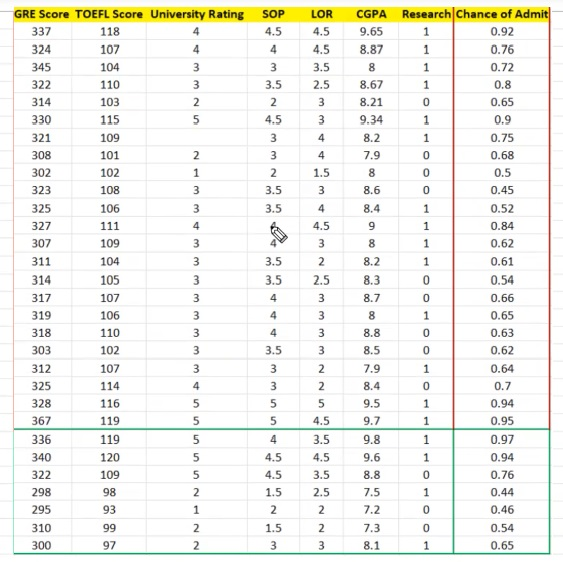






So take  your academic example :-  So when i am training you in your college in that time we are give question and we will also give answer  so you are going to get trained . That all you learn I am going to give  question as well as answer and i am teaching you .



But when i am testing you i will give only question , I dont give you answer . i will hide the answer.



I will give you question for model testing or prediction it will going to predict label.







# How can we check it is Correct or Not



Compare with hided answer . Predicted vs real or Actual . So that is why we splitting in Four Parts that is what exactly same concept here .



--> Every Single time Supervised Machine Learning we use are import sklearn.model_selection  train_test_split.
   
   

# Split data into train and test  Model will be built on Training data and tested on test data.

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()
#Formula is = x_train,x_test,y_train,y_test = train_test_split(standard_scaler,labels,test_size,random_state)

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

# Model Instantiating and Training 

In [20]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [21]:
#Predict the chance of admission give feature
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [25]:
#Since we vahe already fit the scaler . you can tranform the data .
print("Chance of Admission is : ",regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is :  [0.82445851]


When we are learning ,our model was learning , How did it learns it learned on scaled data. So basically we converts out data to scaled data . when we have to scale the data . we only use scaler.transform.

# You can save the model and later you can use it for prediction

In [27]:
#Sac=ving the model to the local file system 
pickle.dump(regression,open('Suarv_file','wb'))

#They Save in bit wise 

# How to open Model



In [37]:
import pickle
lin_model=pickle.load(open('Suarv_file','rb'))

In [29]:
lin_model

LinearRegression()

In [45]:
a=lin_model.predict([[ 0.94125895,  0.96145116,  0.78200955,  1.13735981,  1.09894429,
         0.76721964, -1.12815215]])
print(a)

[0.82445851]


# Prediction using the saved model.

In [41]:
#Prediction using the saved model.

loaded_model=pickle.load(open('Suarv_file','rb'))
a=loaded_model.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))
a

array([0.82445851])

In [43]:
#Lets try in new window with only pickle model

scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])

array([[ 0.94125895,  0.96145116,  0.78200955,  1.13735981,  1.09894429,
         0.76721964, -1.12815215]])

#  What we did lets Summarize this.



- We Observed the data , based on observation , we will find Nan Value



- Check the data visualization



- We check the relatioship



- We Found relationship is good and distributed



- we have stadardizing the data using standard scaler 



- Mean Dataset into train test split 



- we have trained the model (using fit()) by passing (x_train,y_train)



- then we predict



- Then we stored model using pickle


- We save the model using pickle


- Then we also tested using pickle load

# Now its time to check how good in our model.

Lets check how well model fits on train data.

In [47]:
#Adjusted R2
regression.score(x_train,y_train)

#Training Score 
# So that is how i am going to check how good my model understood the training data.

0.82855357382842

In [48]:
#How Well my model will understand testing data.
# Lets check how well model fits the test data
regression.score(x_test,y_test)

#Testing Score

0.7928310580010802

Q - There will be a question that why your test score will be lesser that train score ?



Ans- Because Training Score , Basically will higher because model has already seen the data ,its remember everything, maximum it is going to remember from the training data . beacuse it is exposed  thats why its giving to you .give more score then test. because test data not exposed to the model . model did not see anything from the test data. Thats why test score lesser then train score.

# Lets Plot and Visualize

Now i wanted to test it , Now i am going to pass only x_test to regression model and it is going to predict.
 
 and i also have actual label
 
 
 then i will compare predicted data to actual data .
 
 
 Whatever the result am going to get its my model Confidence / How well my model will perform.

In [1]:
y_pred =(regression.predict(x_test))
y_pred



NameError: name 'regression' is not defined

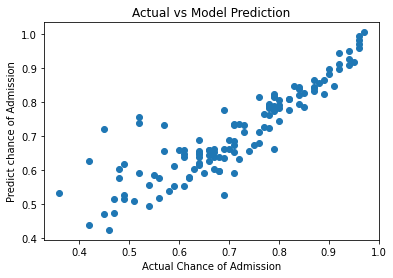

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

# Model Evaluation --> Is also a  Metric 




Mean absolute error (MAE) : Represent average error( You are going to  take error from every single data points , and take average )



Mean Sqaured error (MSE) :Similarly to MAE  but noise is exaggerated and larger error are "punished", it is harder to interpret than MAE as it not in base units , however it is generally more popular.
( There are some outliers in data . it can ignore all outliers and it will go with majority )



Root Mean Sqaured Error : Most popular metric , similar to MSE , how ever , the result is square rooted to make it more . it interpretable as it's in base units . it is recommended that RMSE be used  as primary metric to interpret your model .







Clients ask you hey tell me in a terms of a number , Tell me how much error you model is going to make , i am not aksing one by one , together  you have lakhs of records in   your test data . i want to know overall how much error your models its going to make .



error = residual * Lesser error make better result *

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [56]:
y_pred=regression.predict(x_test)

In [57]:
#MAE
mean_absolute_error(y_test,y_pred)

0.04421359936541997

In [58]:
#MSE
mean_squared_error(y_test,y_pred)

0.004309172332351597

In [60]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.06564428636485888

#  You Have Sucessfully Completed Building Linear Regression Model

--> Now lets check if our models is overfitting our data using regularization



Lets see if our model is overfitting our training data.




# OverFitting - : 

Usually what happenns right, whenever your model gives a good acuuracy a good performance a very MAE,MSE,RMSE , we always look our model , in suspesious way we start getting doubt on our model, client will also get a doubt that, Hey this model is performing wonder full some how i fell that this model is overfitted .


ex- i am going to give you 100 question with answer and i ask you to study this , you will check question answer , you will study this and you learn and you understand everything . you know everything about 100 question. may by you learned  upto 100%  and someone learn 80% what i am trying to say that when i give question answer in you study to get trained and when i conduct exam in the exam question paper if all my question are 90% of the question contains all the question from the learned  question . it means  what , you score high beacuse  you know everything  .and definately you got higer number ..



its also held in real time we get question paper and we know everything sometimes.its happen




Overfitting Means = you have seen the data the trained data , and test dataset also get a same kind of data what my model has seen . Just like you learned all the question and answer same question appearing similar  manner our model has learn all the data  there is a chance that same kind of a data can appear in the test data set as well my model will peform better there is chance and we have no clue that similar data will be in the test data as well we dont know we are suspecting there is a chance of your model is overtfitted. 





When your train model, your training accuracy high but after doing test then test performance is low is know as Overfitting.




# Regularization


If our model ,if you think that your model is overfitted that we are going to regularize it will try  to restrict our model to avoid that overfitting.


--> When we use regression models to train some data , there is a good chance that the model will overfit the given training dataset , regularization helps  sort this overfitting problem by restricting the degrees of freedom of a five equation i.e simply reducing the numbers of degree of polynomial function by reducing  their corresponding weight .


--> In linear equation, we do not want huge weight / coefficient  as a small change in weight can make a large difference for the dependent variables (y) . so regularization



Contraints the weight of such feature to avoid overfitting



To regularize the model a shrinkage penalty is added to the cost fucntion let see different types of regularization in regression.




- LASSO



- Ridge



- Elestic Net

In [61]:
#Continue In Next Lecture

In [ ]:
#Student of DataScience
#Student of DataTrained-Saurav
#Date - 23-08-2022
#Time - 12:35